<a href="https://colab.research.google.com/github/Vickmugo/automobile-data-analysis/blob/main/Data_cleaning_v_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount drive
from google.colab import drive
drive.mount ("/content/drive")
print ("Mounting Successful")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounting Successful


In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import re #This is the regular expression module in Python,
#used for pattern matching and text manipulation.

%matplotlib inline
# It ensures that any plots generated by
#matplotlib are displayed directly within the notebook rather than opening in a separate window.
print("Importing Successful, wait for clearance at port")

Importing Successful, wait for clearance at port


In [ ]:
autos_data = pd.read_csv('/content/drive/MyDrive/datasets/autos data.csv')
autos_data.head()


,Unnamed: 0,symbolling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
#data assessment, cleaning, understanding the data

print(autos_data.head())
print(autos_data.tail())
print(autos_data.dtypes)
print(autos_data.shape)

   Unnamed: 0  symbolling normalized-losses         make fuel-type aspiration  \
0           0           3                 ?  alfa-romero       gas        std   
1           1           3                 ?  alfa-romero       gas        std   
2           2           1                 ?  alfa-romero       gas        std   
3           3           2               164         audi       gas        std   
4           4           2               164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  ...  engine-size  \
0          two  convertible          rwd           front  ...          130   
1          two  convertible          rwd           front  ...          130   
2          two    hatchback          rwd           front  ...          152   
3         four        sedan          fwd           front  ...          109   
4         four        sedan          4wd           front  ...          136   

   fuel-system  bore  stroke  compression-ra

In [ ]:
# checking for missing observations
autos_data.isnull().sum()

,0
Unnamed: 0,0
symbolling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0


In [ ]:
# no missing observations

In [ ]:
# checking for duplicates
autos_data.duplicated().sum()

np.int64(0)

In [ ]:
#no duplicates

In [ ]:
autos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         205 non-null    int64  
 1   symbolling         205 non-null    int64  
 2   normalized-losses  205 non-null    object 
 3   make               205 non-null    object 
 4   fuel-type          205 non-null    object 
 5   aspiration         205 non-null    object 
 6   num-of-doors       205 non-null    object 
 7   body-style         205 non-null    object 
 8   drive-wheels       205 non-null    object 
 9   engine-location    205 non-null    object 
 10  wheel-base         205 non-null    float64
 11  length             205 non-null    float64
 12  width              205 non-null    float64
 13  height             205 non-null    float64
 14  curb-weight        205 non-null    int64  
 15  engine-type        205 non-null    object 
 16  num-of-cylinders   205 non

In [ ]:
# converting price column to float
# Check the data type
autos_data['price'].dtype


dtype('O')

In [ ]:
autos_data['price'] = autos_data['price'].replace('?', np.nan)

In [ ]:
autos_data['price'] = pd.to_numeric(autos_data['price'])

In [ ]:
average_price = autos_data['price'].mean()
print(average_price)

13207.129353233831


In [ ]:
autos_data['price'].value_counts()

,count
price,
16500.0,2
6229.0,2
7609.0,2
7957.0,2
6692.0,2
...,...
16845.0,1
19045.0,1
21485.0,1


In [ ]:
autos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         205 non-null    int64  
 1   symbolling         205 non-null    int64  
 2   normalized-losses  205 non-null    object 
 3   make               205 non-null    object 
 4   fuel-type          205 non-null    object 
 5   aspiration         205 non-null    object 
 6   num-of-doors       205 non-null    object 
 7   body-style         205 non-null    object 
 8   drive-wheels       205 non-null    object 
 9   engine-location    205 non-null    object 
 10  wheel-base         205 non-null    float64
 11  length             205 non-null    float64
 12  width              205 non-null    float64
 13  height             205 non-null    float64
 14  curb-weight        205 non-null    int64  
 15  engine-type        205 non-null    object 
 16  num-of-cylinders   205 non

In [ ]:
# so converted price to a float and got rid of missing values

In [ ]:
autos_data.describe(include = 'all')

,Unnamed: 0,symbolling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,201.000000
unique,NaN,NaN,52,22,2,2,3,5,3,2,...,NaN,8,39,37,NaN,60,24,NaN,NaN,NaN
top,NaN,NaN,?,toyota,gas,std,four,sedan,fwd,front,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,NaN
freq,NaN,NaN,41,32,185,168,114,96,120,202,...,NaN,94,23,20,NaN,19,37,NaN,NaN,NaN
mean,102.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,13207.129353
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,7947.066342
min,0.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,5118.000000
25%,51.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,7775.000000
50%,102.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,10295.000000
75%,153.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,16500.000000


In [ ]:
# fix the question mark in normalized losses.
autos_data['normalized-losses'] = autos_data['normalized-losses'].replace('?', np.nan)

In [ ]:
autos_data['normalized-losses'] = pd.to_numeric(autos_data['normalized-losses'])

In [ ]:
# Ensure 'normalized-losses' is numeric, coercing errors to NaN
autos_data['normalized-losses'] = pd.to_numeric(autos_data['normalized-losses'], errors='coerce')

average_normalized_losses = autos_data['normalized-losses'].mean()
print(average_normalized_losses)

122.0


In [ ]:
autos_data['normalized-losses'].value_counts()

,count
normalized-losses,
161.0,11
91.0,8
150.0,7
128.0,6
104.0,6
134.0,6
74.0,5
103.0,5
168.0,5


In [ ]:
autos_data.describe(include = 'all')

,Unnamed: 0,symbolling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,164.000000,205,205,205,205,205,205,205,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,201.000000
unique,NaN,NaN,NaN,22,2,2,3,5,3,2,...,NaN,8,39,37,NaN,60,24,NaN,NaN,NaN
top,NaN,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,NaN
freq,NaN,NaN,NaN,32,185,168,114,96,120,202,...,NaN,94,23,20,NaN,19,37,NaN,NaN,NaN
mean,102.000000,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,13207.129353
std,59.322565,1.245307,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,7947.066342
min,0.000000,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,5118.000000
25%,51.000000,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,7775.000000
50%,102.000000,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,10295.000000
75%,153.000000,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,16500.000000


In [ ]:
# no "?" in remaining columns as observed

In [ ]:
# Two-sample t-test, checking if there's a siginficant difference in average car prices
# betweem gas and diesel fuel types.
# used .drop na as I got 'na' for t-stat & p-value
# split data by fuel type
gas_price = autos_data[autos_data['fuel-type'] == 'gas']['price'].dropna()
diesel_price = autos_data[autos_data['fuel-type'] == 'diesel']['price'].dropna()

# performing the t-test
t_statistic, p_value = stats.ttest_ind(gas_price, diesel_price)

# printing the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
# making a conclusion
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in average car prices between gas and diesel cars.")
else:
    print("There is no significant difference in average car prices between gas and diesel cars.")

T-statistic: -1.5658926002375724
P-value: 0.1189625443809135
There is no significant difference in average car prices between gas and diesel cars.


In [ ]:
# A negative t-statistic means the mean price for gas cars is lower than that of diesel cars
# since p-value, 0.1189> 0.05, we fail to reject the null hypothesis

In [ ]:
# test for normality
shapiro_gas = stats.shapiro(gas_price)
shapiro_diesel = stats.shapiro(diesel_price)
print(f"Shapiro-Wilk test for normality (gas): W={shapiro_gas.statistic:.4f}, p={shapiro_gas.pvalue:.4f}")
print(f"Shapiro-Wilk test for normality (diesel): W={shapiro_diesel.statistic:.4f}, p={shapiro_diesel.pvalue:.4f}")

Shapiro-Wilk test for normality (gas): W=0.7760, p=0.0000
Shapiro-Wilk test for normality (diesel): W=0.8972, p=0.0365


Text(0.5, 0, 'Price')

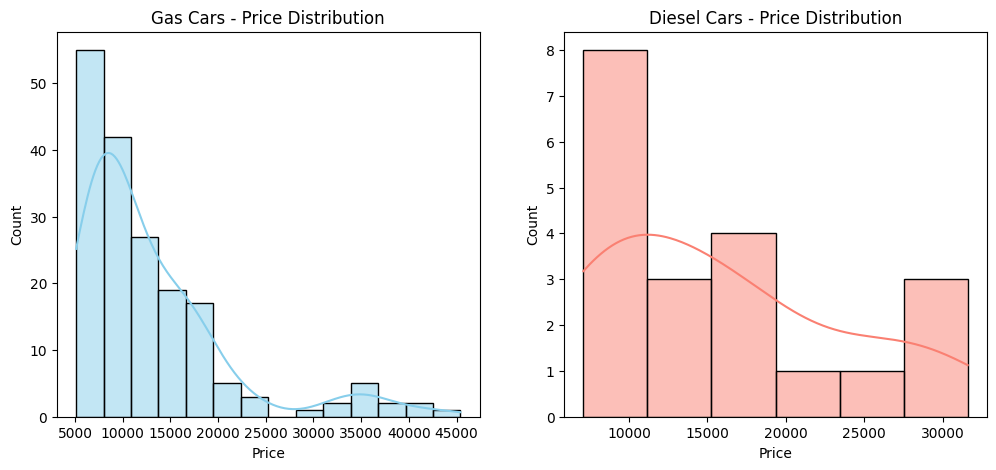

In [ ]:
# plot histogram of differences
plt.figure(figsize=(12, 5))

# Gas
plt.subplot(1, 2, 1)
sns.histplot(gas_price, kde=True, color='skyblue', edgecolor='black')
plt.title("Gas Cars - Price Distribution")
plt.xlabel("Price")

# Diesel
plt.subplot(1, 2, 2)
sns.histplot(diesel_price, kde=True, color='salmon', edgecolor='black')
plt.title("Diesel Cars - Price Distribution")
plt.xlabel("Price")


In [ ]:
# for gas cars: p<0.05 so we reject the null hypothesis, concluding that gas car prices are not normally distributed
# for diesel cars: p<0.05 so we also reject the null hypothesis.

In [ ]:
# is there a difference in average car prices across different body styles?
from scipy.stats import f_oneway

# Group prices by body-style
autos_data = autos_data.dropna(subset=['price'])  # remove rows where price is NaN
groups = [group['price'].values for name, group in autos_data.groupby('body-style')]

# Perform ANOVA
f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat}, p-value: {p_val}")



F-statistic: 9.128751854708211, p-value: 8.779795237614595e-07


In [ ]:
# F-statistic = 9.13. This tells us there's a relatively large variance
# between group means compared to within each group.
# Goal of the ANOVA Test? To answer this question:
#“Is there a statistically significant difference in the average car price between the different body styles?”
# the hypothesis is, either Null(All body styles have the same average price)
# or Alternative Hypothesis(At least one body style has an average price that differs from the others)
# p-value = 0.000000878.That’s way less than 0.05, so the result is statistically significant.
# so in clonclusion, at least one body style differs in price

Chi-square for independence/association

In [ ]:
# Is there a relationship between fuel-type and drive-wheels?
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(autos_data['fuel-type'], autos_data['drive-wheels'])
print(contingency_table)

drive-wheels  4wd  fwd  rwd
fuel-type                  
diesel          0    9   11
gas             8  109   64


In [ ]:
# chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic = {chi2:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p:.4f}")

Chi-Square Statistic = 3.4567
Degrees of Freedom = 2
P-value = 0.1776


In [ ]:
# p > 0.05, meaning there's no significant relationship

In [ ]:
autos_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   symbolling         201 non-null    int64  
 2   normalized-losses  164 non-null    float64
 3   make               201 non-null    object 
 4   fuel-type          201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       201 non-null    object 
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non-null

In [ ]:
## replace (?,',^,#) character strings with missing values
# we noticed some variables that should be numeric but were object(categorical)

autos_data_v2 = autos_data.replace("?" , np.nan)

# looping over variables that require conversion from categorical to numeric
variables_convert = [ 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price']
for col in variables_convert:
  autos_data_v2[col] = pd.to_numeric(autos_data_v2[col])

print(autos_data_v2[variables_convert].info())

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bore        197 non-null    float64
 1   stroke      197 non-null    float64
 2   horsepower  199 non-null    float64
 3   peak-rpm    199 non-null    float64
 4   price       201 non-null    float64
dtypes: float64(5)
memory usage: 9.4 KB
None


In [ ]:
from sklearn.linear_model import LinearRegression



In [ ]:
# Statistical summaries
autos_data['price'] = pd.to_numeric(autos_data['price'], errors = 'coerce')
autos_data['engine-size'] = pd.to_numeric(autos_data['engine-size'], errors = 'coerce')
autos_data = autos_data.dropna(subset = ['price', 'engine-size'])

#mean
mean_price = autos_data['price'].mean()
mean_engine_size = autos_data['engine-size'].mean()

#median
median_price = autos_data['price'].median()
median_engine_size = autos_data['engine-size'].median()

#variance
variance_price = autos_data['price'].var()
variance_engine_size = autos_data['engine-size'].var()

#Standard Deviation
std_price = autos_data['price'].std()
std_engine_size = autos_data['engine-size'].std()

print(f"Mean Price: {mean_price}")
print(f"Mean Engine Size: {mean_engine_size}")
print(f"Median Price: {median_price}")
print(f"Median Engine Size: {median_engine_size}")
print(f"Variance Price: {variance_price}")
print(f"Variance Engine Size: {variance_engine_size}")
print(f"Standard Deviation Price: {std_price}")
print(f"Standard Deviation Engine Size: {std_engine_size}")

Mean Price: 13207.129353233831
Mean Engine Size: 126.87562189054727
Median Price: 10295.0
Median Engine Size: 120.0
Variance Price: 63155863.443184026
Variance Engine Size: 1726.1394527363163
Standard Deviation Price: 7947.066341939271
Standard Deviation Engine Size: 41.54683444904457


In [ ]:
# linear regression (engine-size vs price)
# Reshape for sklearn

x = autos_data['engine-size'].values.reshape(-1, 1)
y = autos_data['price'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(x,y)

print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Slope: {model.coef_[0][0]:.2f}")

Intercept: -7963.34
Slope: 166.86


In [ ]:
# Correlation Coefficients
# Pearson's correlation(linear)
pearson_corr, pearson_p = stats.pearsonr(autos_data['engine-size'], autos_data['price'])
print(f"Pearson correlation: {pearson_corr:.4f}, p-value: {pearson_p:.4f}")

Pearson correlation: 0.8723, p-value: 0.0000


In [ ]:
# +0.8723 indicates a strong positive linear relationship between engine-size and price
# P-value = 0.0000. Since p < 0.05, this result is statistically significant
# we can reject the null hypothesis that there's no correlation
# in conclusion, There is a strong, statistically significant positive linear relationship
# between engine size and car price.


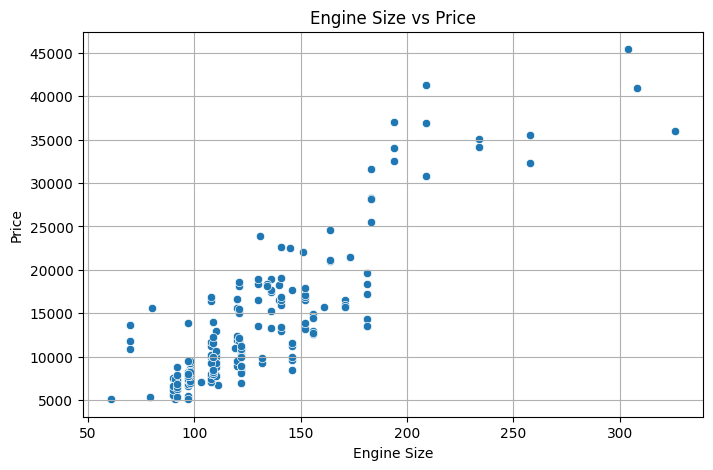

In [ ]:
# scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='engine-size', y='price', data=autos_data)
plt.title("Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.grid(True)
plt.show()

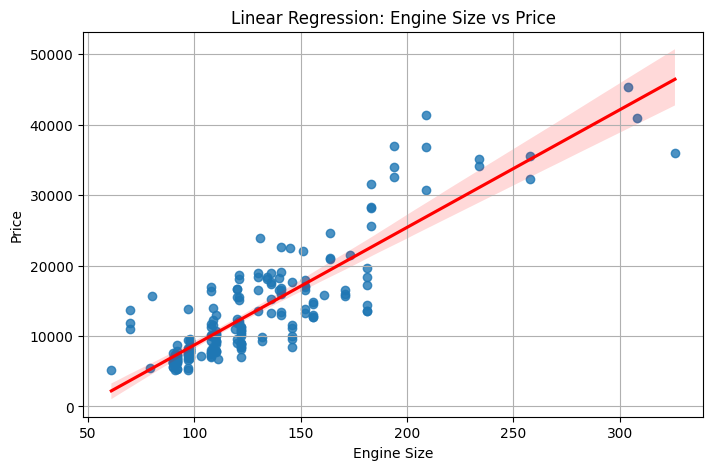

In [ ]:
# Regression Line plot
plt.figure(figsize=(8, 5))
sns.regplot(x='engine-size', y='price', data=autos_data, line_kws={"color":"red"})
plt.title("Linear Regression: Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.grid(True)
plt.show()

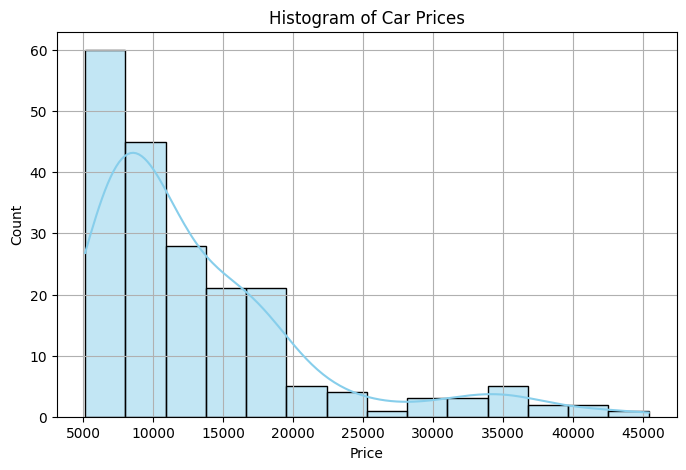

In [ ]:
# Histogram showcasing price distribution
plt.figure(figsize=(8, 5))
sns.histplot(autos_data['price'], kde=True, color='skyblue', edgecolor='black')
plt.title("Histogram of Car Prices")
plt.xlabel("Price")
plt.grid(True)
plt.show()

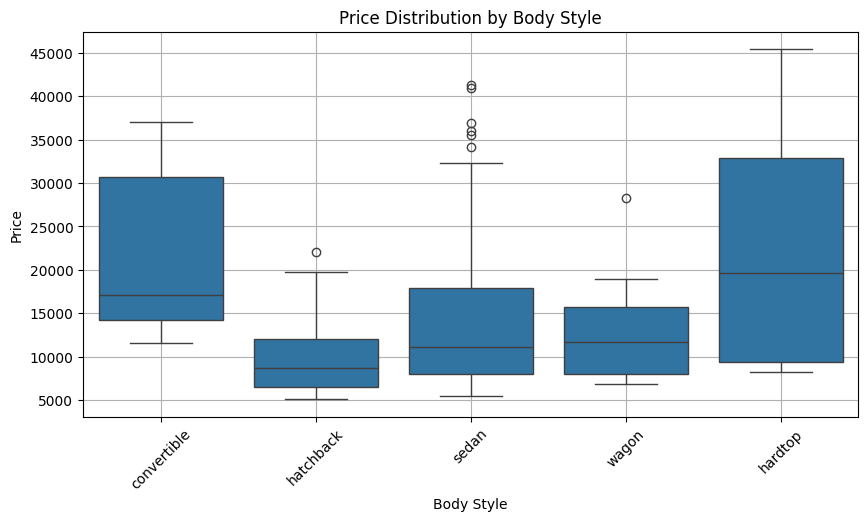

In [ ]:
# Boxplot: Price by Body Style
plt.figure(figsize=(10, 5))
sns.boxplot(x='body-style', y='price', data=autos_data)
plt.title("Price Distribution by Body Style")
plt.xlabel("Body Style")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

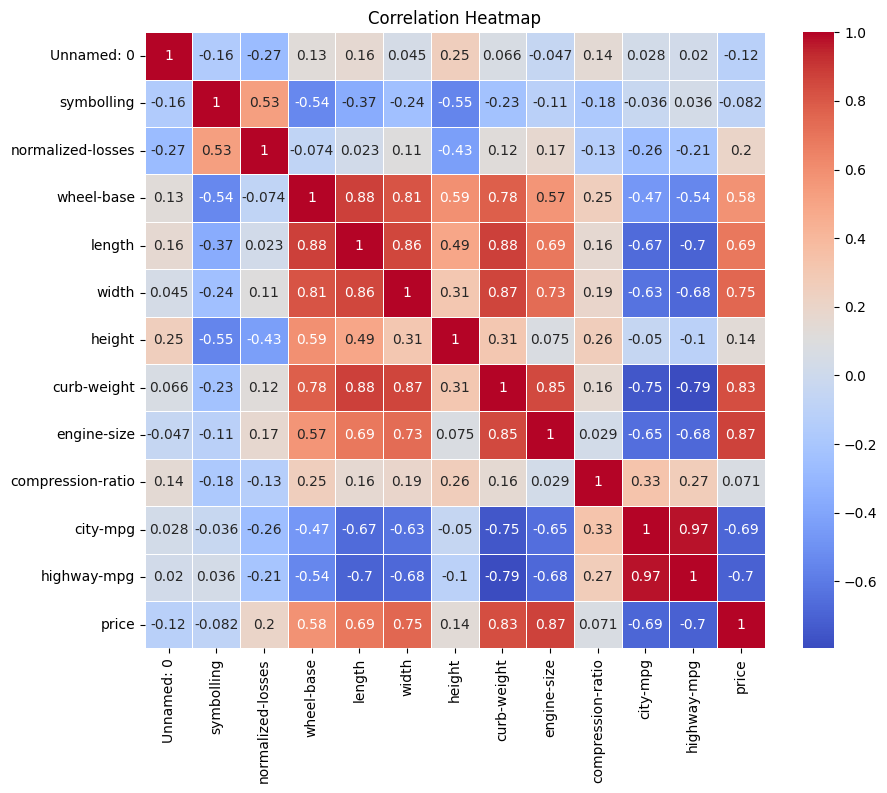

In [ ]:
# Heatmap: Correlation Between Numeric Features
plt.figure(figsize=(10, 8))
numeric_autos_data = autos_data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_autos_data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()